In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

from clib.bellhop import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
s = bellhop({'mediterrannee': './SSP_4profils.mat'},name='cognac_2000m_test',rmax=50.)

{'name': 'cognac_2000m_test',
 'freq': 3000.0,
 'zs': 100.0,
 'zmin': 0.0,
 'zmax': 2550.0,
 'rmin': 0.0,
 'rmax': 50.0,
 'NDepth': 2551.0,
 'NRange': 5001.0,
 'zbox': 3050.0,
 'rbox': 51.0,
 'ALimites': [-15.0, 15.0],
 'NBeams': 0,
 'bottom': 1600.0,
 'file_type': 'R',
 'file_bathy': 'cognac_2000m_test.bty',
 'file_env': 'cognac_2000m_test.env',
 'file_ssp': 'cognac_2000m_test.ssp'}

# Celerity profile choice 

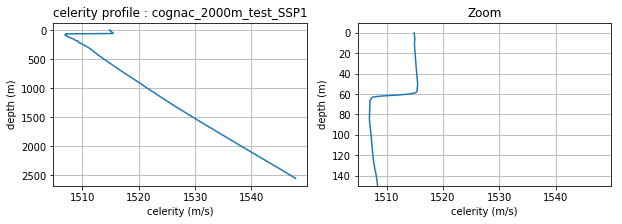

In [3]:
issp=0                                 # sound speed profile number
s.plotssp('mediterrannee', Issp=issp)

# Full calculations on this Mediterrannée profile 

- *Bathymetry* : flat bottom at 2000 m depth

- *Source* : one source at 100m depth at range 0km

- *Receivers* : **Depth : every 1m from 0 to 500m depth    /    Range : every 10m from 0 to 10 km **


In [13]:
# Generate .env file A

issp=0                                # sound speed profile number

s.params['file_type'] = 'A'           # 'E' : eigen rays (.rau) / 'A' : arrivals time and amplitude file (.arr)
s.params['zs'] = 100.                 # source depth
s.params['ALimites'] = [-90.0, 90.0]  # limit angles

s.params['NDepth'] = 501              # number of receiver depths
s.params['zmin'] = 0.                 # minimum depth (m)
s.params['zmax'] = 500.               # maximum depth (m) (unuseful if NDepth=1)
                 

s.params['NRange'] = 10001            # number of receiver range    
s.params['rmin'] = 0.                 # minimum range (km)
s.params['rmax'] = 100.               # maximum range (km) (unuseful if NRange=1)            

s.params['zbox'] = 2500.              # box depth limit 
s.params['rbox'] = 101.               # box range limit 

s.generate_envfile('mediterrannee',file_env = s.params['name']+'_A_full.env', Issp=issp, SSP_depth_step=10)


Output file is : cognac_2000m_test_A_full.env


In [14]:
# read file .arr 
Arr, Pos = s.read_arrivals_asc ('files_arr/cognac_2000m_test_A_full.arr', Narrmx = 15)

Max.number of arrivals for source index 0 is 10


In [15]:
Nsd = np.shape(Pos['s']['depth'])[0]
Nrd = np.shape(Pos['r']['depth'])[0]
Nrr = np.shape(Pos['r']['range'])[0]

print('number of source depths   : Nsd = ', Nsd)
print('number of receiver depths : Nrd = ', Nrd)
print('number of receiver ranges : Nrr = ', Nrr)


number of source depths   : Nsd =  1
number of receiver depths : Nrd =  501
number of receiver ranges : Nrr =  10001


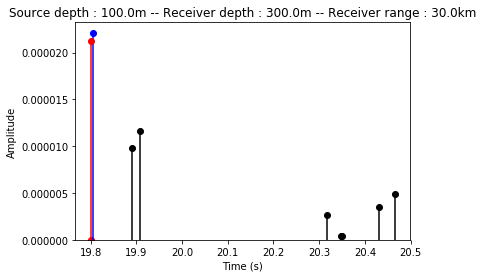

In [18]:
# example for one receiver

isd = 0       # choice of source depth (from 0 to Nsd-1)  
ird = 300     # choice of receiver depth (from 0 to Nrd-1)
irr = 3000    # choice of receiver range (from 0 to Nrr-1)

s.plotarr(Arr, Pos, irr, ird, isd)
#plt.xlim (xmin = 1.652, xmax = 1.6525)

## How to change Amplitude unit in dB ?? 

In [49]:
Narr = int(Arr['Narr'][irr,ird,isd])
A = abs(Arr['A'][irr, :Narr, ird, isd])
print('Amplitude : \n', A)
db = -20.0 * np.log10 (A) 
print('\nAmplitude in dB : \n', db)

################### to be completed... ######################

Amplitude : 
 [4.91701365e-06 9.77235907e-06 1.15907815e-05 4.35306885e-07
 9.08574896e-22 2.21201426e-05 3.54570822e-06 2.12531831e-05
 4.35124358e-07 2.69460716e-06]

Amplitude in dB : 
 [106.16597173 100.20001168  98.71774561 127.22408928 420.83278534
  93.10424155 109.00594011  93.45152032 127.2277321  111.39009081]


# 1 - Max of Amplitude Map 

In [51]:
Max_A = np.zeros( (Nrr, Nrd, Nsd) )
for isd1 in range (Nsd):
    for ird1 in range (Nrd) : 
        for irr1 in range (Nrr) :
            Narr = int(Arr['Narr'][irr1, ird1, isd1])
            if not Narr ==0 :
                A = abs(Arr['A'][irr1, :Narr, ird1, isd1])
                maxA = A[np.where(A==np.max(A))][0]
                Max_A[irr1,ird1,isd1] = maxA

L'amplitude maximum est égale à 0.096


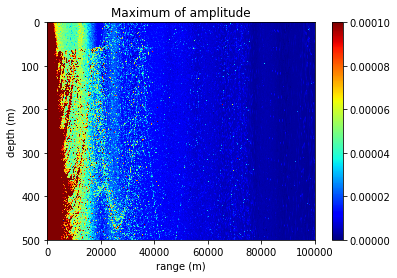

In [61]:
isd = 0    # source number (only 1 source here)
R = Pos['r']['range']
Z = Pos['r']['depth']
plt.pcolormesh(R, Z, Max_A[:,:,isd].T, cmap='jet')
plt.title ('Maximum of amplitude')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
#cbar.set_label("dB")
plt.clim([0,1e-4])
plt.gca().invert_yaxis()

print("L'amplitude maximum est égale à %.3f" %np.max(Max_A[:,:,isd]))

L'amplitude maximum est égale à inf dB.


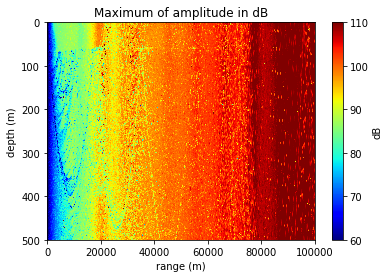

In [70]:
Max_A_dB  = -20.0*np.log10( Max_A )
plt.pcolormesh(R, Z, Max_A_dB[:,:,isd].T, cmap='jet')
plt.title ('Maximum of amplitude in dB')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("dB")
plt.clim([60,110])
plt.gca().invert_yaxis()

print("L'amplitude maximum est égale à %.1f dB." %np.max(Max_A_dB[:,:,isd]))

# 2 - Max of amplitude : direct ray  or bottom-reflected ray ?

### direct or not ?

In [40]:
# for all sources and all receivers
# Dir : direct : -1 // reflechis fond : 1 ou nbre de reflections
# Nb_ref : nbre de reflections 

c = 1500     # celerity (m/s)
Dir = np.zeros( (Nrr, Nrd, Nsd) )
Nb_ref = np.zeros( (Nrr, Nrd, Nsd) )

for isd1 in range (Nsd):
    for ird1 in range (Nrd) : 
        for irr1 in range (Nrr) :
            Narr = int(Arr['Narr'][irr1, ird1, isd1])
            if not Narr ==0 :
                A = abs(Arr['A'][irr1, :Narr, ird1, isd1])
                NumBotBnc = Arr['NumBotBnc'][irr1,:Narr, ird1, isd1]
                NumTopBnc = Arr['NumTopBnc'][irr1,:Narr, ird1, isd1]
                n_bot_max = NumBotBnc[np.where(A==np.max(A))][0]  # NumBotBnc of ray with max of amplitude
                n_top_max = NumTopBnc[np.where(A==np.max(A))][0]
                
                Nb_ref [irr1, ird1, isd1] = n_bot_max + n_top_max
                if n_bot_max ==0 :
                    Dir [irr1, ird1, isd1] = -1
                else : 
                    Dir [irr1,ird1,isd1] = 1
                

source number :  0


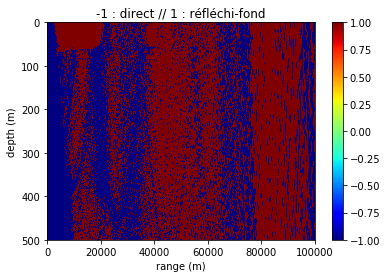

In [41]:
isd = 0    # source number (only 1 source here)

R = Pos['r']['range']
Z = Pos['r']['depth']
plt.pcolormesh(R, Z, Dir[:,:,isd].T, cmap='jet')
plt.title ('-1 : direct // 1 : réfléchi-fond')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
plt.gca().invert_yaxis()

We work with 5010501 receivers.


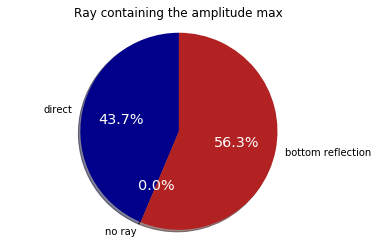

In [43]:
tot = np.shape(Dir)[0]*np.shape(Dir)[1]
print('We work with %d receivers.' %tot)
direct = np.shape( np.where(Dir==-1)[0] )[0]
no_ray = np.shape( np.where(Dir==0)[0] )[0]
bot_ref = np.shape( np.where(Dir>=1)[0] )[0]


name = ['direct', 'no ray', 'bottom reflection']
data = [direct, no_ray, bot_ref]
patches, texts, autotexts = plt.pie(data, labels=name, \
                                    colors=['darkblue','y','firebrick'], \
                                    autopct='%1.1f%%', startangle=90, shadow=True)  
for t in autotexts:
    t.set_color('w')
    t.set_size('x-large')
plt.axis('equal')
plt.title ('Ray containing the amplitude max')
plt.show()


Le max d'amplitude n'est peut être pas la meilleure solution. Vaut-il mieux travailler avec un seuil de détection ? Quel seuil ? (équation du sonar)

### Number of reflexions

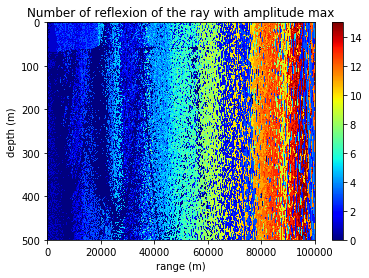

In [45]:
plt.pcolormesh(R, Z, Nb_ref[:,:,isd].T, cmap='jet')
plt.title ('Number of reflexion of the ray with amplitude max')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
plt.gca().invert_yaxis()

# 3 - Difference of amplitude with direct ray 

In [34]:
# direct : 1 // reflechis fond : -1
# for all sources and all receivers

c = 1500     # celerity (m/s)
Diff_A = np.zeros( (Nrr, Nrd, Nsd) )

for isd1 in range (Nsd):
    print('source number : ', isd1)
    for ird1 in range (Nrd) : 
        #print('%d/%d' %(ird1,Nrd))
        for irr1 in range (Nrr) :
            Narr = int(Arr['Narr'][irr1, ird1, isd1])
            if not Narr ==0 :
                A = abs(Arr['A'][irr1, :Narr, ird1, isd1])
                NumBotBnc = Arr['NumBotBnc'][irr1,:Narr, ird1, isd1]
                nmax_R = NumBotBnc[np.where(A==np.max(A))][0]  # NumBotBnc of ray with max of amplitude
                
                if nmax_R ==0 :
                    Diff_A [irr1, ird1, isd1] = 0
                    
                else : 
                    Amp_max = A[np.where(A==np.max(A))][0]
                    Amp_D= A[np.where(NumBotBnc==0)]
                    if len(Amp_D)>0 : 
                        Amp_D_max = Amp_D[np.where(Amp_D==np.max(Amp_D))][0]
                        
                        Diff_A [irr1, ird1, isd1] = np.min([Amp_max/Amp_D_max,100])  # ratio reflected / direct 
                    else : 
                        Diff_A [irr1, ird1, isd1] = 100

source number :  0


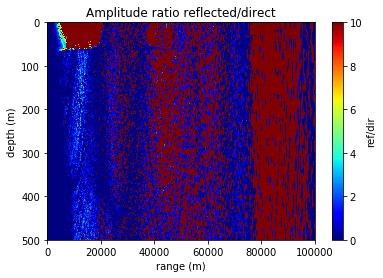

In [35]:
isd = 0    # source number (only 1 source here)

R = Pos['r']['range']
Z = Pos['r']['depth']
plt.pcolormesh(R, Z, Diff_A[:,:,isd].T, cmap='jet')
plt.title ('Amplitude ratio reflected/direct')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("ref/dir")
plt.clim([0,10])
plt.gca().invert_yaxis()

# 4 - Error dx on distance if amplitude max is used instead of first arrival

In [47]:
# error dx for all sources and all receivers

c = 1500     # celerity (m/s)
DX = np.zeros( (Nrr, Nrd, Nsd) )

for isd1 in range (Nsd):
    for ird1 in range (Nrd) : 
        for irr1 in range (Nrr) :
            Narr = int(Arr['Narr'][irr1, ird1, isd1])
            if not Narr ==0 :
                A = abs(Arr['A'][irr1, :Narr, ird1, isd1])
                t = Arr['delay'][irr1, :Narr, ird1, isd1]
                t_max = t[np.where(A==np.max(A))][0]   # time of arrival of max of amplitude
                t0 = np.min(t)                         # time of first arrival
                dt = t_max - t0
                dx = c * dt
                DX [irr1, ird1, isd1] = dx  

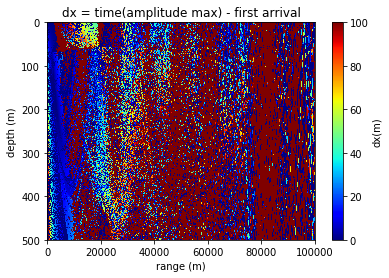

In [48]:
isd = 0    # source number (only 1 source here)

R = Pos['r']['range']
Z = Pos['r']['depth']
plt.pcolormesh(R, Z, DX[:,:,isd].T, cmap='jet')
plt.title ('dx = time(amplitude max) - first arrival')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("dx(m)")
plt.clim ([0,100])
plt.gca().invert_yaxis()